# Joseph Breneman, Data Reduction Notebook

In [361]:
from astropy.table import Table
import pandas as pd
import numpy as np
from astropy.nddata import CCDData
import ccdproc
image_1 = CCDData(np.ones((10, 10)), unit="adu")
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from msumastro import ImageFileCollection, TableTree
import ccdproc

In [362]:
from ccdproc import ImageFileCollection
from glob import glob
dirs = glob('arcsat2019')

In [363]:
ic_all = ImageFileCollection('.', glob_include='*Bias*')

In [364]:
data_dir = '../arcsat2019/'

images = ImageFileCollection(data_dir, keywords='*')

imstats = lambda dat: (dat.min(), dat.max(), dat.mean(), dat.std())

bias_list=[]
for hdu, fname in images.hdus(imagetyp='Bias Frame', return_fname=True):
    meta = hdu.header
    meta['filename'] = fname
    bias_list.append(ccdproc.CCDData(data=hdu.data, meta=meta, unit="adu"))

In [365]:
#bias_list

In [366]:
#oscan_and_trim(bias_list)

In [367]:
biases = ccdproc.Combiner(bias_list)
master_bias = biases.average_combine()
master_bias

CCDData([[1302.        , 1303.18181818, 1302.54545455, ..., 1304.72727273,
          1305.        , 1300.81818182],
         [1299.27272727, 1302.72727273, 1299.36363636, ..., 1301.36363636,
          1300.54545455, 1297.90909091],
         [1304.63636364, 1301.27272727, 1303.90909091, ..., 1304.27272727,
          1302.81818182, 1304.63636364],
         ...,
         [1314.18181818, 1311.81818182, 1309.72727273, ..., 1310.81818182,
          1310.54545455, 1308.54545455],
         [1311.09090909, 1311.81818182, 1308.54545455, ..., 1312.54545455,
          1311.45454545, 1311.63636364],
         [1309.54545455, 1312.27272727, 1313.63636364, ..., 1311.54545455,
          1310.36363636, 1308.90909091]])

In [368]:
print(master_bias)
print(biases)

[[1302.         1303.18181818 1302.54545455 ... 1304.72727273
  1305.         1300.81818182]
 [1299.27272727 1302.72727273 1299.36363636 ... 1301.36363636
  1300.54545455 1297.90909091]
 [1304.63636364 1301.27272727 1303.90909091 ... 1304.27272727
  1302.81818182 1304.63636364]
 ...
 [1314.18181818 1311.81818182 1309.72727273 ... 1310.81818182
  1310.54545455 1308.54545455]
 [1311.09090909 1311.81818182 1308.54545455 ... 1312.54545455
  1311.45454545 1311.63636364]
 [1309.54545455 1312.27272727 1313.63636364 ... 1311.54545455
  1310.36363636 1308.90909091]]


In [369]:
bias_min, bias_max, bias_mean, bias_std = imstats(np.asarray(master_bias))

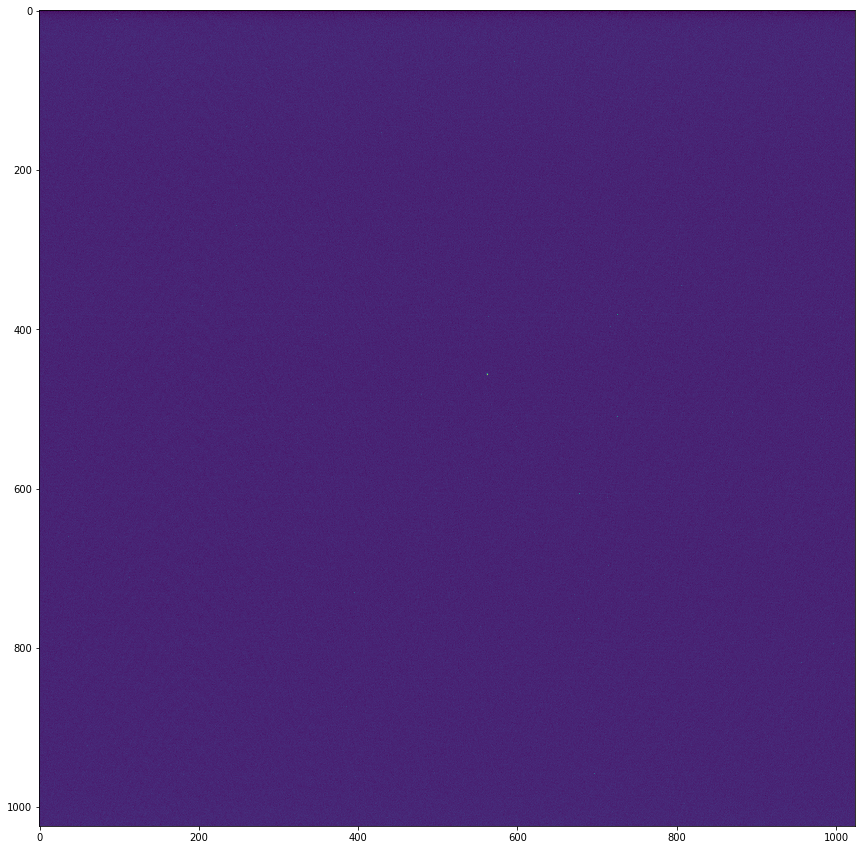

In [370]:
plt.figure(figsize=(15, 15))
plt.imshow(np.log10(master_bias));

In [371]:
np.mean(master_bias)

masked_array(data=1309.51494113,
             mask=False,
       fill_value=1e+20)

In [372]:
np.mean(bias_list[0])

1309.5129508972168

In [373]:
s2=[]
for hdu, fname in images.hdus(object='S2', return_fname=True):
    meta = hdu.header
    meta['filename'] = fname
    s2.append(ccdproc.CCDData(data=hdu.data, meta=meta, unit="adu"))

In [374]:
s2           #This is my image of M3

[CCDData([[1604, 1764, 1826, ..., 1595, 1553, 1744],
          [1861, 1665, 1740, ..., 1632, 1498, 1477],
          [1788, 1816, 2074, ..., 1477, 1490, 1495],
          ...,
          [1457, 1542, 1667, ..., 1799, 1470, 1597],
          [1535, 1732, 1772, ..., 1543, 1549, 1499],
          [1592, 1730, 1667, ..., 1618, 1447, 1667]])]

In [375]:
np.max(s2[0])

65535

In [376]:
np.max(bias_list[0])

1366

In [377]:
s2_com = ccdproc.Combiner(s2)
s2_ave = s2_com.average_combine()

CCDData([[1604., 1764., 1826., ..., 1595., 1553., 1744.],
         [1861., 1665., 1740., ..., 1632., 1498., 1477.],
         [1788., 1816., 2074., ..., 1477., 1490., 1495.],
         ...,
         [1457., 1542., 1667., ..., 1799., 1470., 1597.],
         [1535., 1732., 1772., ..., 1543., 1549., 1499.],
         [1592., 1730., 1667., ..., 1618., 1447., 1667.]])

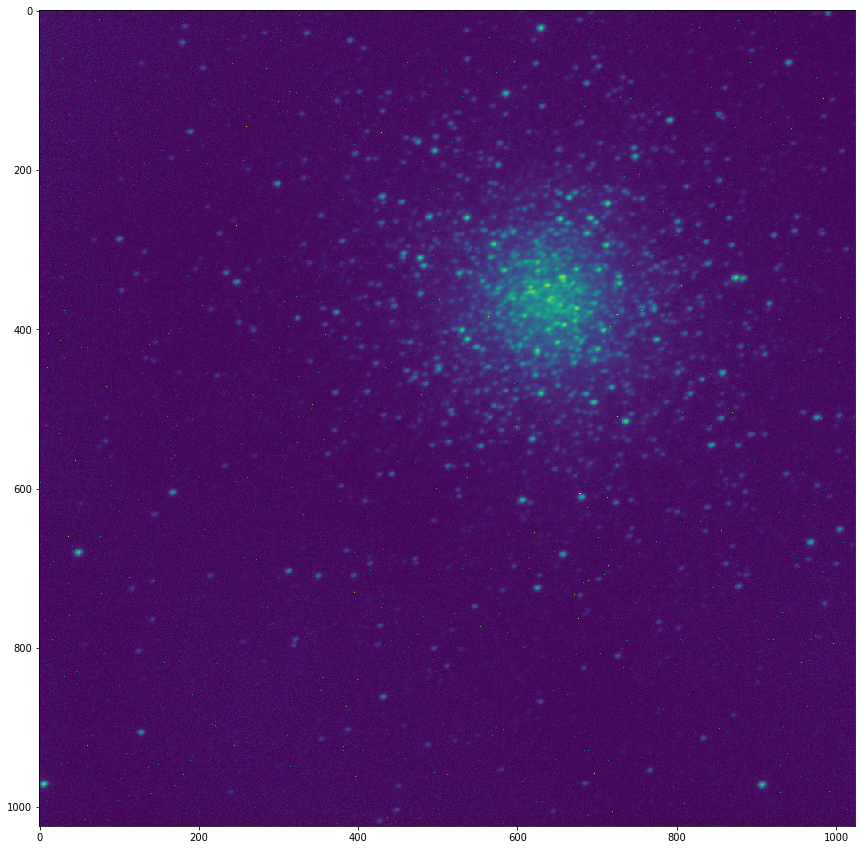

In [378]:
s2_min, s2_max, s2_mean, s2_std = imstats(np.asarray(s2_ave))

plt.figure(figsize=(15, 15))
plt.imshow(np.log10(s2_ave));
s2_ave

CCDData([[302.        , 460.81818182, 523.45454545, ..., 290.27272727,
          248.        , 443.18181818],
         [561.72727273, 362.27272727, 440.63636364, ..., 330.63636364,
          197.45454545, 179.09090909],
         [483.36363636, 514.72727273, 770.09090909, ..., 172.72727273,
          187.18181818, 190.36363636],
         ...,
         [142.81818182, 230.18181818, 357.27272727, ..., 488.18181818,
          159.45454545, 288.45454545],
         [223.90909091, 420.18181818, 463.45454545, ..., 230.45454545,
          237.54545455, 187.36363636],
         [282.45454545, 417.72727273, 353.36363636, ..., 306.45454545,
          136.63636364, 358.09090909]])

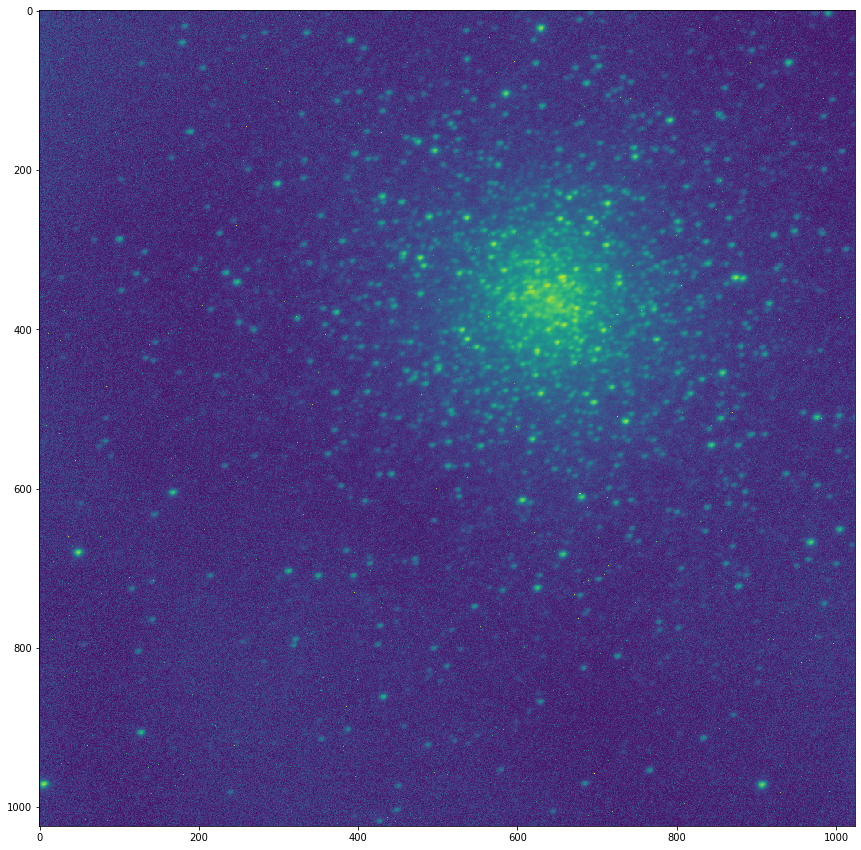

In [379]:
bias_subtracted_s2=ccdproc.subtract_bias(s2_ave, master_bias)

s2_sbias_min, s2_sbias_max, s2_sbias_mean, s2_sbias_std = imstats(np.asarray(bias_subtracted_s2))

plt.figure(figsize=(15, 15))
plt.imshow(np.log10(bias_subtracted_s2));
bias_subtracted_s2

In [380]:
skyflat=[]
for hdu, fname in images.hdus(imagetyp='flat', filter='V', return_fname=True):
    meta = hdu.header
    meta['filename'] = fname
    skyflat.append(ccdproc.CCDData(data=hdu.data, meta=meta, unit="adu"))
skyflat

[CCDData([[18344, 18496, 18533, ..., 18601, 18742, 18510],
          [18628, 18518, 18269, ..., 18717, 18781, 18474],
          [18348, 18168, 18123, ..., 18723, 18696, 18637],
          ...,
          [18593, 18454, 18361, ..., 18524, 18647, 18700],
          [18893, 18434, 18268, ..., 18813, 18658, 18716],
          [18517, 18561, 18336, ..., 18771, 18531, 18595]]),
 CCDData([[17611, 17718, 17405, ..., 18165, 17855, 17916],
          [17513, 17678, 17609, ..., 17833, 17721, 17997],
          [17487, 17346, 17643, ..., 17895, 18071, 17668],
          ...,
          [17767, 17788, 17459, ..., 17918, 17720, 17992],
          [18074, 17696, 17673, ..., 18001, 17994, 17863],
          [17931, 17754, 17595, ..., 17863, 17743, 17944]]),
 CCDData([[17566, 17804, 17807, ..., 18195, 18129, 18050],
          [17998, 17628, 17525, ..., 17877, 17946, 18062],
          [17621, 17850, 17446, ..., 17885, 17911, 17780],
          ...,
          [17975, 17814, 17697, ..., 18158, 17966, 17826],
       

In [381]:
skyflat_com = ccdproc.Combiner(skyflat)
skyflat = skyflat_com.average_combine()

skyflat

CCDData([[17393.5 , 17618.75, 17520.5 , ..., 17919.5 , 17841.25, 17716.  ],
         [17674.5 , 17554.75, 17353.  , ..., 17691.25, 17721.25, 17728.75],
         [17453.5 , 17426.  , 17308.  , ..., 17741.  , 17802.75, 17589.25],
         ...,
         [17708.  , 17623.75, 17374.75, ..., 17738.75, 17685.25, 17743.5 ],
         [17850.5 , 17624.  , 17445.75, ..., 17806.25, 17790.  , 17795.5 ],
         [17714.  , 17645.75, 17410.25, ..., 17799.  , 17649.5 , 17840.5 ]])

# Photometry

In [382]:
from astropy.io import fits
hdu = fits.open('quadRU.fits')[0]

In [383]:
import numpy as n
from photutils import datasets
#hdu = datasets.load_star_image()
image = hdu.data[0:900, 0:900].astype(float)
image -= np.median(image)

In [398]:
from photutils import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(image)
daofind = DAOStarFinder(fwhm=4, threshold=4*bkg_sigma)
sources = daofind(image)
sources=sources.to_pandas()
sources=sources.sort_values(['peak'])  #The last 4 peaks on the list are over 60,000 counts

sources=sources[0:199]          #Edited table without the stars that peak over 60,000 counts
sources



id   xcentroid   ycentroid  sharpness  roundness1  roundness2  npix  \
90    91  618.394894  352.335545   0.291421    0.652140    0.005510    25   
31    32   31.823132  119.077979   0.406730   -0.086860   -0.126924    25   
134  135  177.043005  582.592555   0.454747    0.045464   -0.115824    25   
126  127  110.153605  539.598378   0.267785   -0.545067   -0.285893    25   
28    29  212.362665  105.075545   0.252552   -0.121577   -0.466133    25   
101  102  292.136276  436.990816   0.251557    0.109068   -0.439680    25   
195  196   74.009270  891.386877   0.288580    0.617025    0.043379    25   
34    35   95.712808  137.866302   0.386354    0.427089    0.328801    25   
74    75  482.769643  304.072017   0.243997    0.403201    0.187099    25   
8      9  484.571909   42.495585   0.380021    0.333602    0.139642    25   
116  117   48.971274  502.891154   0.467417    0.196779   -0.172133    25   
20    21  267.606892   83.210768   0.584974    0.453346   -0.176099    25   
183  184   20.238850  845.781859   0.561915    0.413048   -0.192371    25   
22    23  627.233098   86.962966   0.452509    0.241939   -0.076256    25   
41    42  495.208133  170.257230   0.485082    0.235178   -0.053979    25   
18    19  548.007591   72.004077   0.969136   -0.777022   -0.519026    25   
193  194  349.296367  881.433780   0.469121    0.556423   -0.270542    25   
162  163  191.157081  734.246755   0.328752    0.361103   -0.560685    25   
53    54  854.290063  210.865803   0.665455   -0.101425   -0.588241    25   
12    13  174.952738   55.558801   0.356176    0.547574   -0.113983    25   
42    43  288.450895  178.443910   0.456194    0.368997    0.011572    25   
171  172  639.483036  765.346722   0.214940   -0.170551   -0.604414    25   
133  134  530.301398  575.104952   0.451108    0.728344    0.193762    25   
32    33  135.271906  125.262337   0.335453    0.424284    0.036197    25   
61    62  376.115431  258.671647   0.606649    0.225510   -0.003152    25   
187  188  897.798869  854.093657   0.454483    0.529656    0.712437    25   
202  203  897.641204  897.446183   0.332566   -0.273946    0.078620    25   
66    67  155.486239  274.241223   0.506550    0.142664   -0.008688    25   
201  202  847.021501  897.596828   0.475737   -0.827490   -0.876815    25   
86    87  557.543308  328.218370   0.326792    0.211042    0.391247    25   
..   ...         ...         ...        ...         ...         ...   ...   
194  195  889.019755  884.693734   0.460472    0.040317   -0.143254    25   
111  112  801.399470  476.455032   0.412738    0.323525   -0.173427    25   
30    31  720.389875  113.970799   0.412259    0.179437   -0.183193    25   
78    79  607.515037  308.935946   0.428425    0.176608   -0.284014    25   
63    64  712.118148  267.129870   0.398619    0.191034   -0.207361    25   
50    51  480.765270  204.033005   0.406459    0.218269   -0.150120    25   
197  198  613.222821  891.173469   0.377294    0.261840   -0.039492    25   
179  180  854.645357  798.485091   0.435483    0.176920   -0.120905    25   
60    61  616.371930  251.886686   0.421861    0.236670   -0.142615    25   
6      7  587.593781   36.751537   0.431035    0.258115   -0.218690    25   
174  175  864.027757  777.395711   0.408587    0.177881   -0.103478    25   
189  190  377.361237  860.573676   0.412260    0.470582   -0.021063    25   
38    39  589.085408  157.122254   0.382464    0.215856   -0.220091    25   
181  182  167.461452  816.155947   0.388950    0.364076   -0.162852    25   
37    38  664.985679  146.211182   0.419592    0.220434   -0.221144    25   
80    81  604.245472  319.261130   0.391395    0.315273   -0.148215    25   
5      6  172.866626   24.843851   0.396021    0.295021   -0.151434    25   
19    20  728.451452   74.787870   0.405459    0.210156   -0.137839    25   
127  128  218.879045  540.212636   0.428344    0.330857   -0.097116    25   
154  155  859.045093  677.643541   0.414929    0.197050   -0.093900    25   
19

In [385]:
from photutils import aperture_photometry, CircularAperture
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=3)
phot_table = aperture_photometry(image, apertures, method='exact', subpixels=1)
phot_table[0:203]

<QTable length=199>
  id       xcenter            ycenter          aperture_sum   
             pix                pix                           
int64      float64            float64            float64      
----- ------------------ ------------------ ------------------
    1  618.3948943201705  352.3355450838996  973.8769021851109
    2  31.82313181846912 119.07797905968539  856.8205008794255
    3 177.04300514151186  582.5925553179814   745.761611477732
    4 110.15360457997151  539.5983783244285  1292.143748155956
    5 212.36266542088623 105.07554476379835  1202.882173261211
    6 292.13627586254034  436.9908162490304 1299.4001388237853
    7  74.00927039894091  891.3868772495011  995.3321944195784
    8  95.71280839201236 137.86630200901413 1125.6927468525987
    9 482.76964317073026  304.0720171066208 1348.8842770037736
  ...                ...                ...                ...
  190  552.7988899792279  862.3064772208363  79161.95760528249
  191   821.911389843381  619.6673084798415  83000.67776429738
  192  84.47249367244493 319.98903985432435 102495.85511609718
  193 21.739915320753585  242.9362398890591 104341.95523946176
  194  427.1514226281333 136.86039293367313 111318.05483412006
  195 201.70482852894264  621.7169717297286 136136.59996765235
  196   847.032501028803  658.8543825477324  155602.1047597815
  197  542.2962697251082  98.76344581840961 162100.23641433497
  198  285.8736407323272 158.50186489969414   52701.5939116917
  199 197.67943447209856  404.2635127965069  268026.4535295563

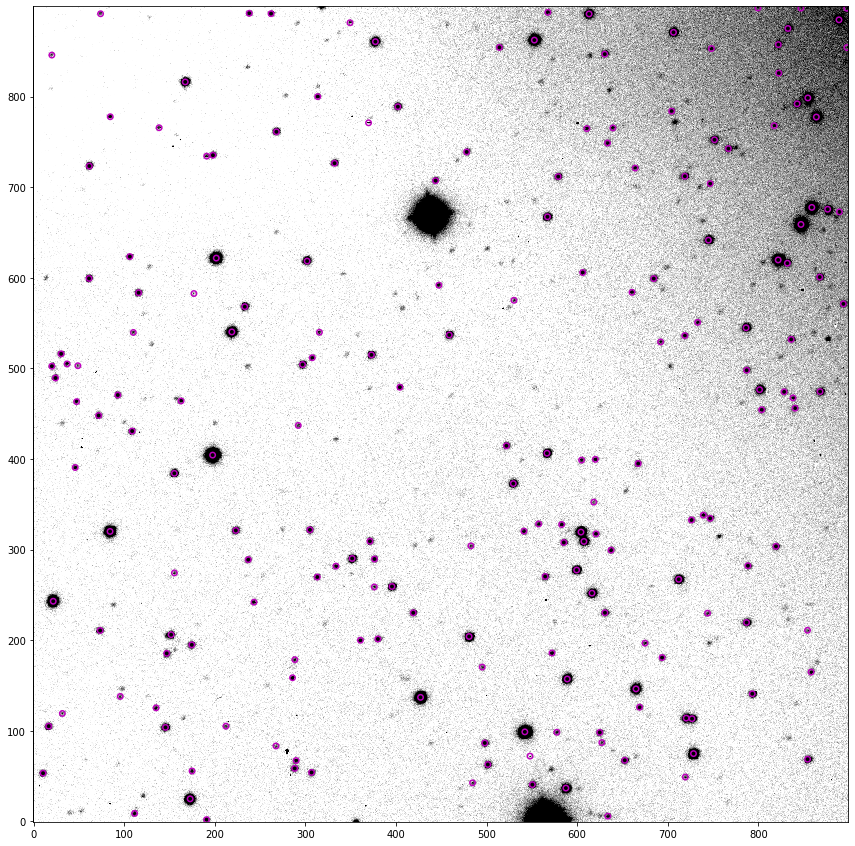

In [386]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray_r', origin='lower', vmin=0, vmax=100)
apertures.plot(color='m', lw=1.5, alpha=0.99)

In [387]:
image

array([[ 9.89646499e+03, -4.26409087e+00, -2.01974877e+01, ...,
        -2.40420252e+00,  1.58592856e+01, -7.67615299e+00],
       [ 1.00508798e+04, -8.25376605e-01, -3.42428597e+00, ...,
         1.23831255e-01,  7.85221609e+00,  2.14776392e+01],
       [ 9.93532313e+03, -3.04567846e+00,  3.80099972e+00, ...,
         8.26424314e-01, -9.09194647e+00, -2.50501821e+00],
       ...,
       [ 9.85349908e+03, -4.17800005e+01, -3.42228494e+01, ...,
         9.63187452e+01,  1.04235546e+02,  8.95009393e+01],
       [ 9.78608017e+03, -3.28790895e+01, -3.26277607e+01, ...,
         8.64713785e+01,  1.03520365e+02,  9.40188474e+01],
       [ 9.87848170e+03, -3.61392023e+01, -1.94898754e+01, ...,
         6.49729161e+01,  9.10679392e+01,  9.25409853e+01]])

<QTable length=199>
  id       xcenter            ycenter          aperture_sum   
             pix                pix                           
int64      float64            float64            float64      
----- ------------------ ------------------ ------------------
    1  618.3948943201705  352.3355450838996  973.8769021851109
    2  31.82313181846912 119.07797905968539  856.8205008794255
    3 177.04300514151186  582.5925553179814   745.761611477732
    4 110.15360457997151  539.5983783244285  1292.143748155956
    5 212.36266542088623 105.07554476379835  1202.882173261211
    6 292.13627586254034  436.9908162490304 1299.4001388237853
    7  74.00927039894091  891.3868772495011  995.3321944195784
    8  95.71280839201236 137.86630200901413 1125.6927468525987
    9 482.76964317073026  304.0720171066208 1348.8842770037736
  ...                ...                ...                ...
  190  552.7988899792279  862.3064772208363  79161.95760528249
  191   821.911389843381  619.6673084798415  83000.67776429738
  192  84.47249367244493 319.98903985432435 102495.85511609718
  193 21.739915320753585  242.9362398890591 104341.95523946176
  194  427.1514226281333 136.86039293367313 111318.05483412006
  195 201.70482852894264  621.7169717297286 136136.59996765235
  196   847.032501028803  658.8543825477324  155602.1047597815
  197  542.2962697251082  98.76344581840961 162100.23641433497
  198  285.8736407323272 158.50186489969414   52701.5939116917
  199 197.67943447209856  404.2635127965069  268026.4535295563

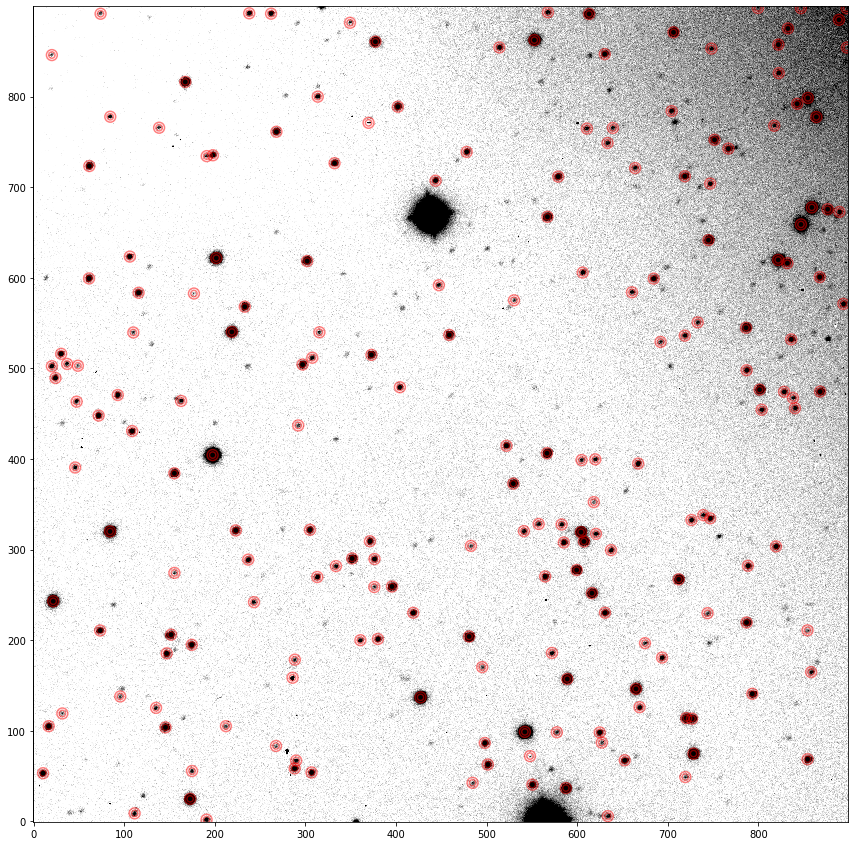

In [388]:
from photutils import aperture_photometry, CircularAnnulus
positions = (sources['xcentroid'], sources['ycentroid'])
apertures_a = CircularAnnulus(positions, r_in=3.5, r_out=6)
phot_table_a = aperture_photometry(image, apertures, method='exact')

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray_r', origin='lower', vmin=0, vmax=100)
apertures_a.plot(color='r', lw=1.5, alpha=0.5)
phot_table_a

In [389]:
apers = [apertures, apertures_a]
phot_table_both = aperture_photometry(image, apers, method='exact')
phot_table_both

<QTable length=199>
  id       xcenter       ...   aperture_sum_0      aperture_sum_1  
             pix         ...                                       
int64      float64       ...      float64             float64      
----- ------------------ ... ------------------ -------------------
    1  618.3948943201705 ...  973.8769021851109   467.1043956093549
    2  31.82313181846912 ...  856.8205008794255 -273.83133407356235
    3 177.04300514151186 ...   745.761611477732 -460.17661224137373
    4 110.15360457997151 ...  1292.143748155956 -109.88666672711827
    5 212.36266542088623 ...  1202.882173261211  258.49134473602203
    6 292.13627586254034 ... 1299.4001388237853  17.865864225095983
    7  74.00927039894091 ...  995.3321944195784  -1261.907780502871
    8  95.71280839201236 ... 1125.6927468525987  -17.27855172138033
    9 482.76964317073026 ... 1348.8842770037736   583.0854009371766
  ...                ... ...                ...                 ...
  190  552.7988899792279 ...  79161.95760528249  28327.383090008054
  191   821.911389843381 ...  83000.67776429738  31583.687038491888
  192  84.47249367244493 ... 102495.85511609718   34308.22575634787
  193 21.739915320753585 ... 104341.95523946176   34712.97121757746
  194  427.1514226281333 ... 111318.05483412006   40505.06103681442
  195 201.70482852894264 ... 136136.59996765235    46093.3767698188
  196   847.032501028803 ...  155602.1047597815   57553.18325795217
  197  542.2962697251082 ... 162100.23641433497  59334.117300219674
  198  285.8736407323272 ...   52701.5939116917  -357.9301652343055
  199 197.67943447209856 ...  268026.4535295563   94129.67120475876

In [390]:
bkg_mean = phot_table_both['aperture_sum_1'] / apertures_a.area()

bkg_sum = bkg_mean * apertures.area()
final_sum = phot_table_both['aperture_sum_0'] - bkg_sum
phot_table_both['residual_aperture_sum'] = final_sum
#print(phot_table_both['residual_aperture_sum'])
phot_table_both

<QTable length=199>
  id       xcenter       ...    aperture_sum_1   residual_aperture_sum
             pix         ...                                          
int64      float64       ...       float64              float64       
----- ------------------ ... ------------------- ---------------------
    1  618.3948943201705 ...   467.1043956093549     796.8689206910396
    2  31.82313181846912 ... -273.83133407356235      960.588164317828
    3 177.04300514151186 ... -460.17661224137373     920.1443276955157
    4 110.15360457997151 ... -109.88666672711827    1333.7850113367588
    5 212.36266542088623 ...  258.49134473602203    1104.9275584138763
    6 292.13627586254034 ...  17.865864225095983    1292.6299165911173
    7  74.00927039894091 ...  -1261.907780502871    1473.5288270311926
    8  95.71280839201236 ...  -17.27855172138033    1132.2404085575429
    9 482.76964317073026 ...   583.0854009371766     1127.925598753896
  ...                ... ...                 ...                   ...
  190  552.7988899792279 ...  28327.383090008054      68427.3703290689
  191   821.911389843381 ...  31583.687038491888     71032.12267602676
  192  84.47249367244493 ...   34308.22575634787     89494.84325053378
  193 21.739915320753585 ...   34712.97121757746     91187.56614648504
  194  427.1514226281333 ...   40505.06103681442     95968.76854648512
  195 201.70482852894264 ...    46093.3767698188    118669.63613908945
  196   847.032501028803 ...   57553.18325795217    133792.47741992594
  197  542.2962697251082 ...  59334.117300219674    139615.72880583067
  198  285.8736407323272 ...  -357.9301652343055     52837.23060588575
  199 197.67943447209856 ...   94129.67120475876    232356.26233617403

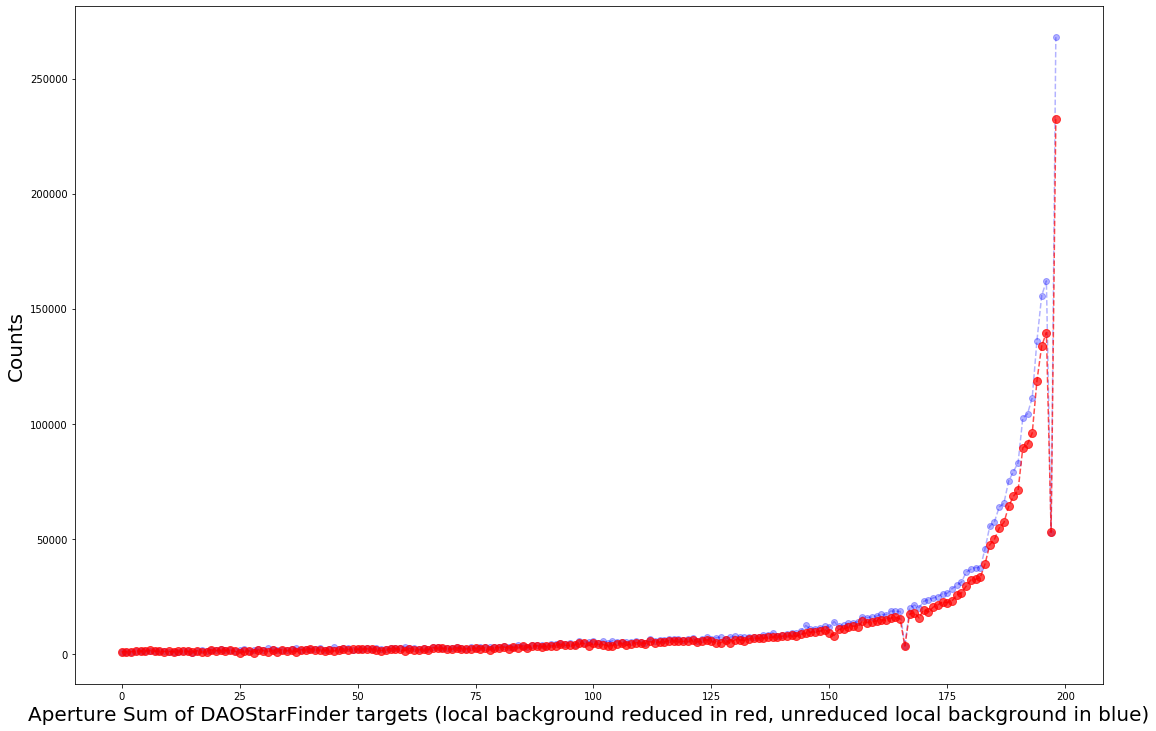

In [391]:
fig, ax = plt.subplots(1,1)                 
fig.set_size_inches(15,10)

fig.tight_layout()

ax.set_xlabel("Aperture Sum of DAOStarFinder targets (local background reduced in red, unreduced local background in blue)", fontsize=20)
ax.set_ylabel("Counts", fontsize=20)

ax.plot(phot_table_both['aperture_sum_0'], color='b', marker="o",linestyle="--",markersize=6, alpha=0.3)
ax.plot(phot_table_both['residual_aperture_sum'], color='r', marker="o",linestyle="--",markersize=8, alpha=0.7);

In [392]:
from photutils.detection import IRAFStarFinder
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm

In [393]:
bkgrms = MADStdBackgroundRMS()
std = bkgrms(image)
#iraffind = IRAFStarFinder(threshold=3.5*std,
#                          fwhm=4,
#                          minsep_fwhm=0.01, roundhi=5.0, roundlo=-5.0,
#                          sharplo=0.0, sharphi=2.0)

daogroup = DAOGroup(2.0*4)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma=2)
from photutils.psf import IterativelySubtractedPSFPhotometry
photometry = IterativelySubtractedPSFPhotometry(finder=daofind,
                                                group_maker=daogroup,
                                                bkg_estimator=mmm_bkg,
                                                psf_model=psf_model,
                                                fitter=LevMarLSQFitter(),
                                                niters=1, fitshape=(11,11))
result_tab = photometry(image=image)
residual_image = photometry.get_residual_image()                                                                            

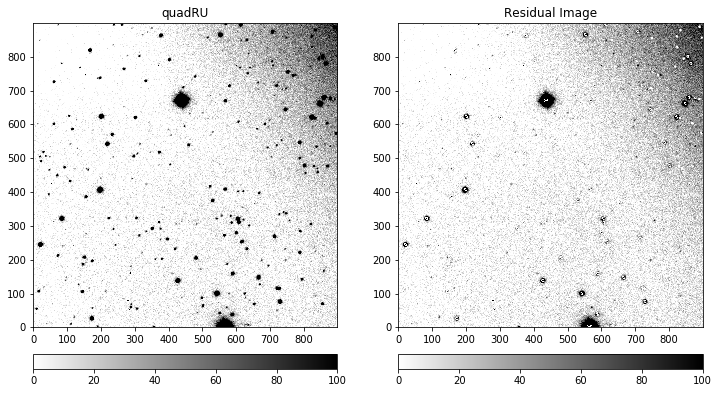

<Table masked=True length=203>
       x_0               x_fit        ...       y_0_unc        iter_detected
     float64            float64       ...       float64            int32    
------------------ ------------------ ... -------------------- -------------
190.99435082792877  191.0920195335332 ...  0.08462220431494413             1
 561.2974457616049  561.9868083211297 ...                  2.0             1
 565.1097789679757  567.0999376847425 ...   1.8139428312603807             1
 633.8872662961309  633.9164405924344 ...  0.09100261536039593             1
111.56587334609034 111.50742683650158 ...  0.07894787168114868             1
172.86662561407712 172.86556691805353 ...  0.02703165707858388             1
 587.5937806506138  587.5987577210859 ... 0.027072109938872112             1
 550.5956282416972  550.6035703584156 ... 0.039697165637775395             1
 484.5719089660772  484.7240079083617 ...  0.13612490984041123             1
 719.4153881441932  719.6272567994929 ...  0.11443437594110985             1
               ...                ... ...                  ...           ...
  349.296367030383  349.5624980292875 ...  0.12110289281642027             1
 889.0197554889816  889.0100028187478 ...  0.04752130676282868             1
 74.00927039894091  73.86989343050627 ...   0.2895382414798932             1
262.19072993366547 262.27551694301906 ...  0.05481164173618724             1
 613.2228210748915  613.2367680597029 ... 0.027745743133143205             1
238.06814804092213 238.23638074435894 ...  0.08778863997966223             1
 567.7480994480853  567.7661569540834 ...   0.0853230784459543             1
 799.6077081021491  800.0884569834203 ...   0.2800272517510114             1
 847.0215009422454   847.733476638803 ...   0.3130474533474809             1
 897.6349097472623  896.5531868258171 ...    0.273505647877959             1

In [394]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray_r', vmin=0, vmax=100, aspect=1, interpolation='nearest',origin='lower')
plt.title('quadRU')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.subplot(1 ,2, 2)
plt.imshow(residual_image, cmap='gray_r', vmin=0, vmax=100, aspect=1, interpolation='nearest', origin='lower')
plt.title('Residual Image')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.show()

result_tab

In [395]:
from photutils.psf import BasicPSFPhotometry

psf_model.x_0.fixed =True
psf_model.y_0.fixed =True
pos = Table(names=['x_0','y_0'], data=[sources['xcentroid'],
                                       sources['ycentroid']])
photometry1 = BasicPSFPhotometry(group_maker=daogroup, 
                                bkg_estimator=mmm_bkg, 
                                psf_model=psf_model, 
                                fitter=LevMarLSQFitter(), 
                                fitshape=(11,11))

result_tab1 = photometry1(image=image, init_guesses=pos)
residual_image1 = photometry1.get_residual_image()
photometry1

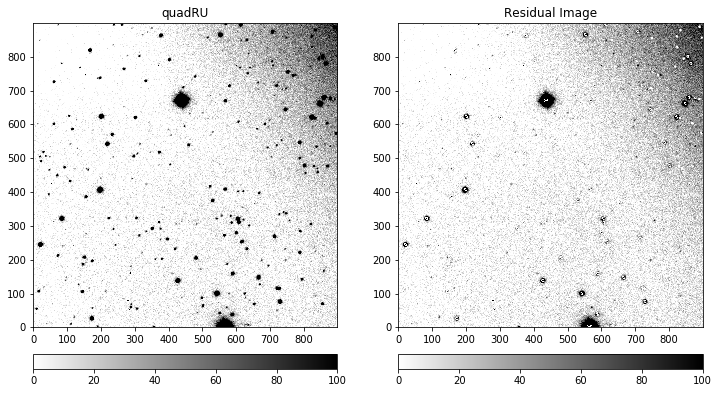

<Table length=199>
       x_0                y_0         ...      flux_fit           flux_unc     
     float64            float64       ...      float64            float64      
------------------ ------------------ ... ------------------ ------------------
 618.3948943201705  352.3355450838996 ... 1721.2246714139203 101.43926538034532
 31.82313181846912 119.07797905968539 ... 1448.2430224838583 102.19330838703875
177.04300514151186  582.5925553179814 ... 1243.9477859938745 102.44704604496872
110.15360457997151  539.5983783244285 ... 2049.8166759980963  87.53632073981379
212.36266542088623 105.07554476379835 ... 1986.3635841713085 117.00901165396226
292.13627586254034  436.9908162490304 ... 2102.7343015345864  89.28190993255981
 74.00927039894091  891.3868772495011 ... 1521.6614640231157 153.44658685324524
 95.71280839201236 137.86630200901413 ... 1833.9810199492968  93.95438672700617
482.76964317073026  304.0720171066208 ... 2253.7745265789686  91.13440386114688
 484.5719089660772 42.495584945808474 ...  2063.401225586648 100.59919175088665
               ...                ... ...                ...                ...
 552.7988899792279  862.3064772208363 ...   120932.306529001 1203.4072099079797
  821.911389843381  619.6673084798415 ... 126784.51591122634 1059.1824899453634
 84.47249367244493 319.98903985432435 ...  156084.8698923632 1557.2087580172897
21.739915320753585  242.9362398890591 ... 159153.33995455573 1586.3873633119465
 427.1514226281333 136.86039293367313 ... 170206.82080468597 1564.3873787009095
201.70482852894264  621.7169717297286 ... 207251.79811877705 2067.4285521786614
  847.032501028803  658.8543825477324 ... 238019.37639301922 2037.3512129977692
 542.2962697251082  98.76344581840961 ... 247019.68106459902  2237.131994103252
 285.8736407323272 158.50186489969414 ...  94989.31024408541 12766.607124200933
197.67943447209856  404.2635127965069 ... 408249.04212866165 3817.8562714186382

In [396]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray_r', vmin=0, vmax=100, aspect=1, interpolation='nearest',origin='lower')
plt.title('quadRU')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.subplot(1 ,2, 2)
plt.imshow(residual_image, cmap='gray_r', vmin=0, vmax=100, aspect=1, interpolation='nearest', origin='lower')
plt.title('Residual Image')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.show()

result_tab1

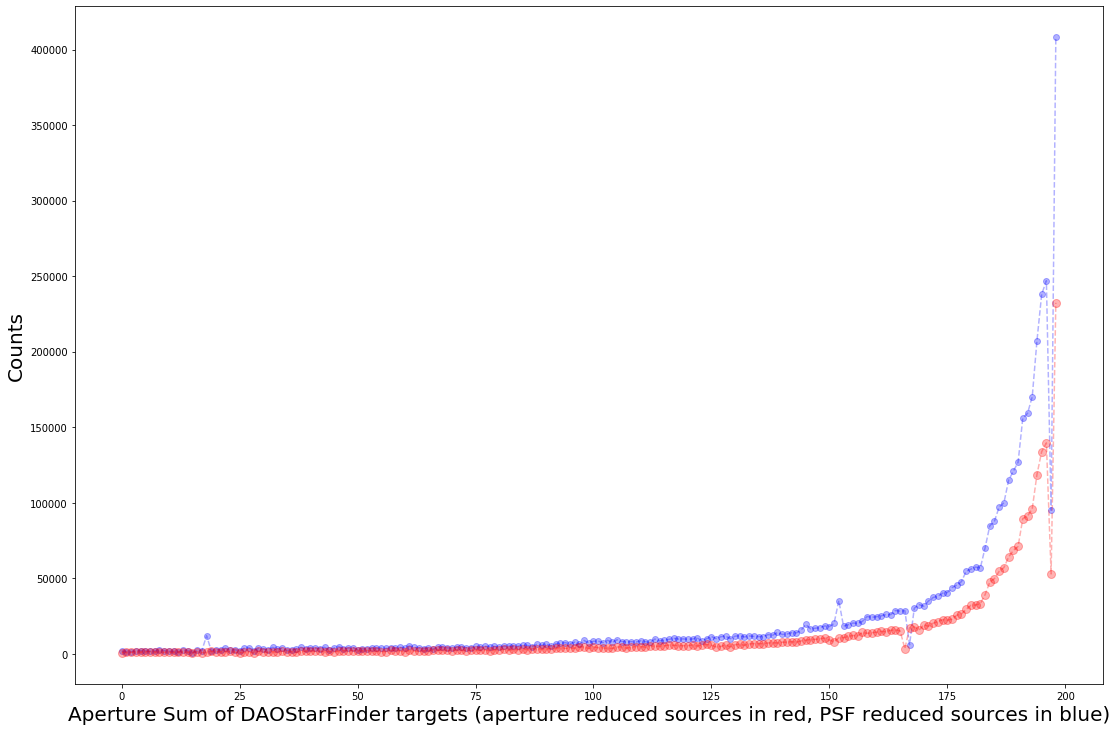

In [397]:
fig, ax = plt.subplots(1,1)                 
fig.set_size_inches(15,10)

fig.tight_layout()

ax.set_xlabel("Aperture Sum of DAOStarFinder targets (aperture reduced sources in red, PSF reduced sources in blue)", fontsize=20)
ax.set_ylabel("Counts", fontsize=20)

ax.plot(result_tab1['flux_fit'], color='b', marker="o",linestyle="--",markersize=6, alpha=0.3)
ax.plot(phot_table_both['residual_aperture_sum'], color='r', marker="o",linestyle="--",markersize=8, alpha=0.3);